VERİLERİN İSTATİKSEL OLARAK İNCELENMESİ VE AYKIRI DEĞERLERİN AYIKLANMASI


In [23]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns




In [25]:
df= pd.read_csv('data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   location      232 non-null    object
 1   city          232 non-null    object
 2   district      232 non-null    object
 3   neighborhood  232 non-null    object
 4   room          232 non-null    int64 
 5   living_room   232 non-null    int64 
 6   area          232 non-null    int64 
 7   age           232 non-null    int64 
 8   floor         232 non-null    int64 
 9   price         232 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 18.3+ KB
None


In [26]:
df['city'] = df['city'].astype('category')
df['district'] = df['district'].astype('category')
df['neighborhood'] = df['neighborhood'].astype('category')
df['location'] = df['location'].astype('category')
df['room'] = df['room'].astype('int')
df['living_room'] = df['living_room'].astype('int')
df['area'] = df['area'].astype('int')
df['age'] = df['age'].astype('int')
df['floor'] = df['floor'].astype('int')
df['price'] = df['price'].astype('int')



In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   location      232 non-null    category
 1   city          232 non-null    category
 2   district      232 non-null    category
 3   neighborhood  232 non-null    category
 4   room          232 non-null    int64   
 5   living_room   232 non-null    int64   
 6   area          232 non-null    int64   
 7   age           232 non-null    int64   
 8   floor         232 non-null    int64   
 9   price         232 non-null    int64   
dtypes: category(4), int64(6)
memory usage: 17.4 KB
None


In [28]:
columns = df.select_dtypes(include=[np.number]).columns
min_values = []
max_values = []

for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    min_value = Q1 - 1.5 * IQR
    max_value = Q3 + 1.5 * IQR
    min_values.append(min_value)
    max_values.append(max_value)
    print(f"Column: {column}, min: {min_value}, max: {max_value}")


Column: room, min: 0.5, max: 4.5
Column: living_room, min: 1.0, max: 1.0
Column: area, min: 30.0, max: 190.0
Column: age, min: -25.875, max: 43.125
Column: floor, min: -2.0, max: 6.0
Column: price, min: -831250.0, max: 6818750.0


AYKIRI DEĞERLERİ TEMİZLEME İŞLEMLERİ

In [29]:
for i, column in enumerate(columns):
    df = df[(df[column] >= min_values[i]) & (df[column] <= max_values[i])]




In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 231
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   location      197 non-null    category
 1   city          197 non-null    category
 2   district      197 non-null    category
 3   neighborhood  197 non-null    category
 4   room          197 non-null    int64   
 5   living_room   197 non-null    int64   
 6   area          197 non-null    int64   
 7   age           197 non-null    int64   
 8   floor         197 non-null    int64   
 9   price         197 non-null    int64   
dtypes: category(4), int64(6)
memory usage: 17.0 KB
None


In [31]:
print(df.describe())

             room  living_room        area         age       floor  \
count  197.000000        197.0  197.000000  197.000000  197.000000   
mean     2.512690          1.0  109.994924   10.314721    2.345178   
std      0.792884          0.0   30.370753   10.831381    1.397023   
min      1.000000          1.0   48.000000    0.000000   -1.000000   
25%      2.000000          1.0   95.000000    0.000000    1.000000   
50%      3.000000          1.0  110.000000    5.000000    2.000000   
75%      3.000000          1.0  130.000000   20.000000    3.000000   
max      4.000000          1.0  185.000000   40.000000    6.000000   

              price  
count  1.970000e+02  
mean   3.067472e+06  
std    1.204585e+06  
min    6.550000e+05  
25%    2.250000e+06  
50%    2.890000e+06  
75%    3.850000e+06  
max    6.600000e+06  


In [32]:
df.to_csv('data_cleaned.csv', index=False)

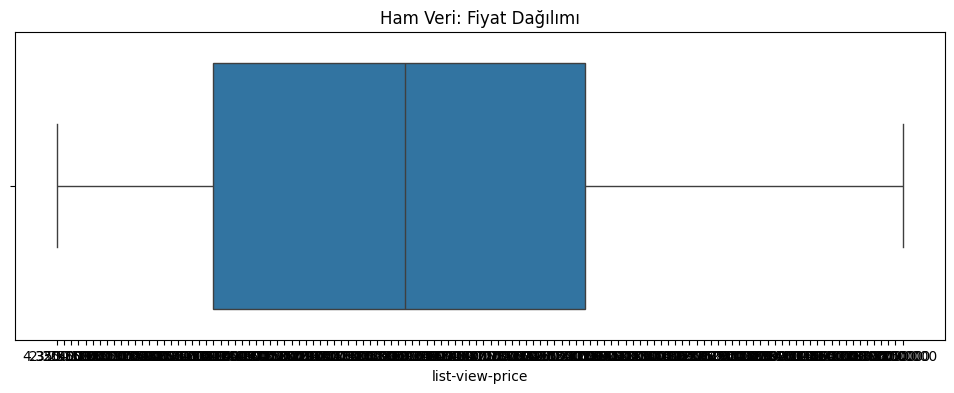

In [38]:
raw = pd.read_csv("hepsiemlak.csv")
plt.figure(figsize=(12,4))
sns.boxplot(x=raw["list-view-price"])
plt.title("Ham Veri: Fiyat Dağılımı")
plt.show()

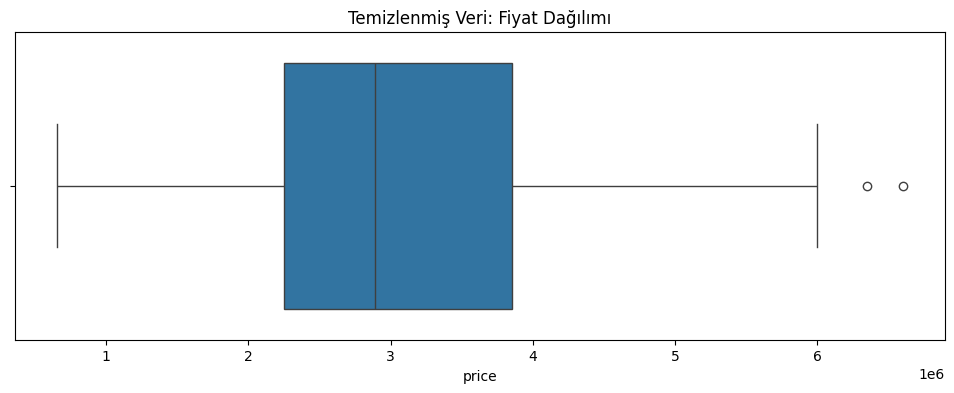

In [39]:
clean = pd.read_csv("data_cleaned.csv")
plt.figure(figsize=(12,4))
sns.boxplot(x=clean["price"])
plt.title("Temizlenmiş Veri: Fiyat Dağılımı")
plt.show()

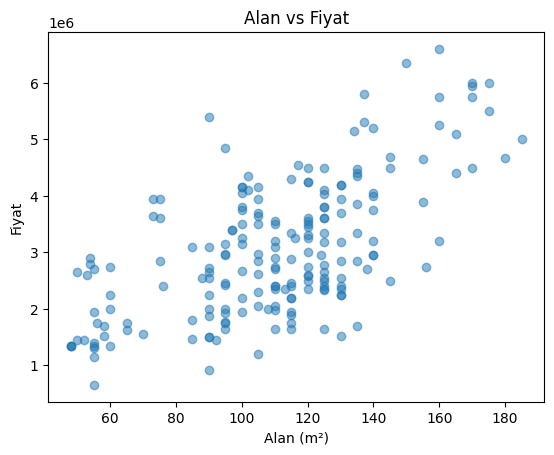

In [40]:
plt.scatter(df["area"], df["price"], alpha=0.5)
plt.xlabel("Alan (m²)")
plt.ylabel("Fiyat")
plt.title("Alan vs Fiyat")
plt.show()


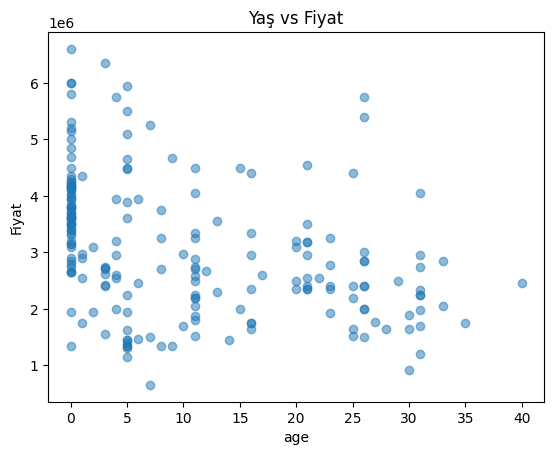

In [45]:
plt.scatter(df["age"], df["price"], alpha=0.5)
plt.xlabel("age")
plt.ylabel("Fiyat")
plt.title("Yaş vs Fiyat")
plt.show()


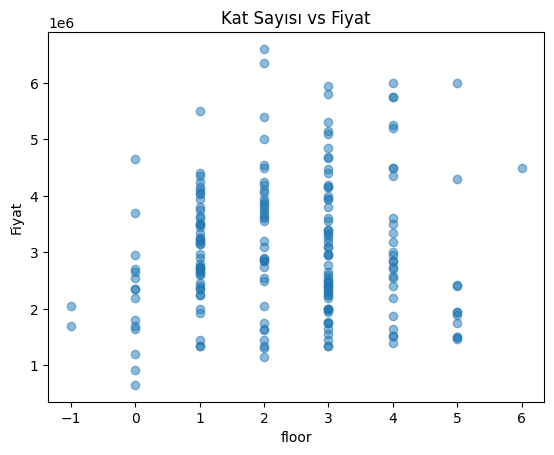

In [49]:
plt.scatter(df["floor"], df["price"], alpha=0.5)
plt.xlabel("floor")
plt.ylabel("Fiyat")
plt.title("Kat Sayısı vs Fiyat")
plt.show()


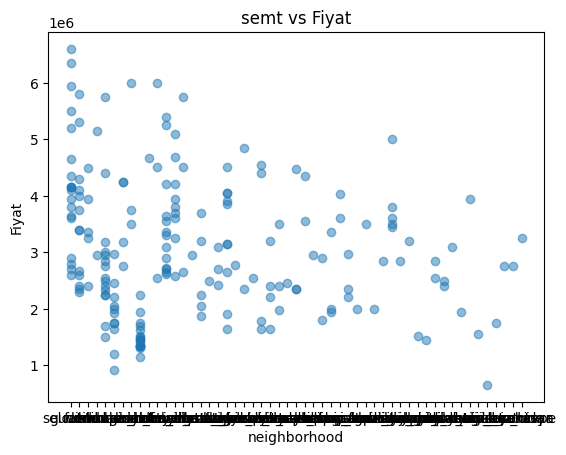

In [50]:
plt.scatter(df["neighborhood"], df["price"], alpha=0.5)
plt.xlabel("neighborhood")
plt.ylabel("Fiyat")
plt.title("semt vs Fiyat")
plt.show()

C:\Users\sema_\AppData\Local\Temp\ipykernel_21828\948241845.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order = (tmp.groupby("neighborhood")["price"]
C:\Users\sema_\AppData\Local\Temp\ipykernel_21828\948241845.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=9)


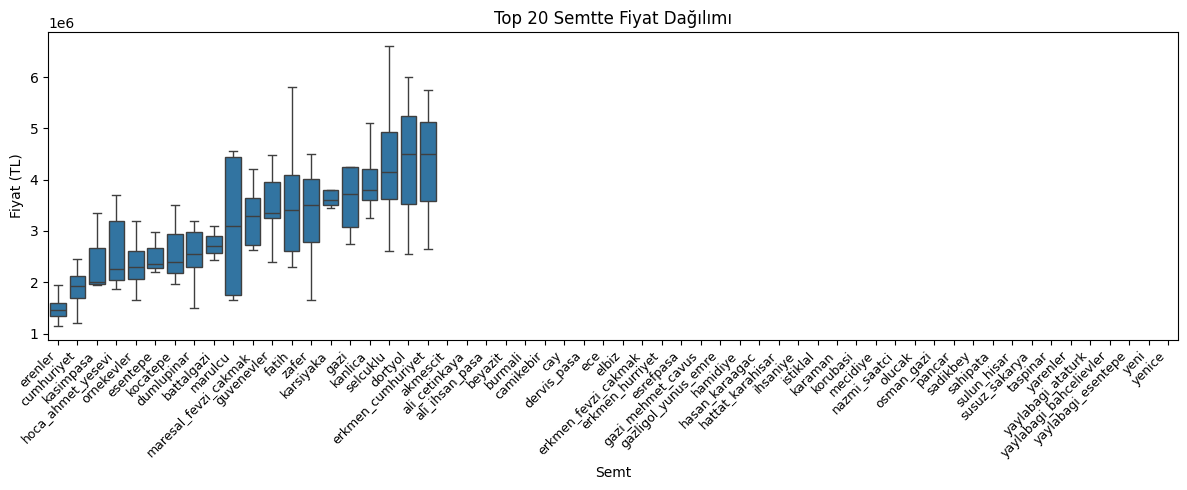

In [51]:
top = df["neighborhood"].value_counts().head(20).index
tmp = df[df["neighborhood"].isin(top)]

order = (tmp.groupby("neighborhood")["price"]
             .median().sort_values().index)  # medyane göre sırala

fig, ax = plt.subplots(figsize=(max(10, 0.6*len(top)), 5))
sns.boxplot(data=tmp, x="neighborhood", y="price",
            order=order, showfliers=False, ax=ax)

ax.set_title("Top 20 Semtte Fiyat Dağılımı")
ax.set_xlabel("Semt"); ax.set_ylabel("Fiyat (TL)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=9)
fig.tight_layout()
plt.show()

C:\Users\sema_\AppData\Local\Temp\ipykernel_21828\2394394569.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order = (df.groupby("neighborhood")["price"]
C:\Users\sema_\AppData\Local\Temp\ipykernel_21828\2394394569.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=9)


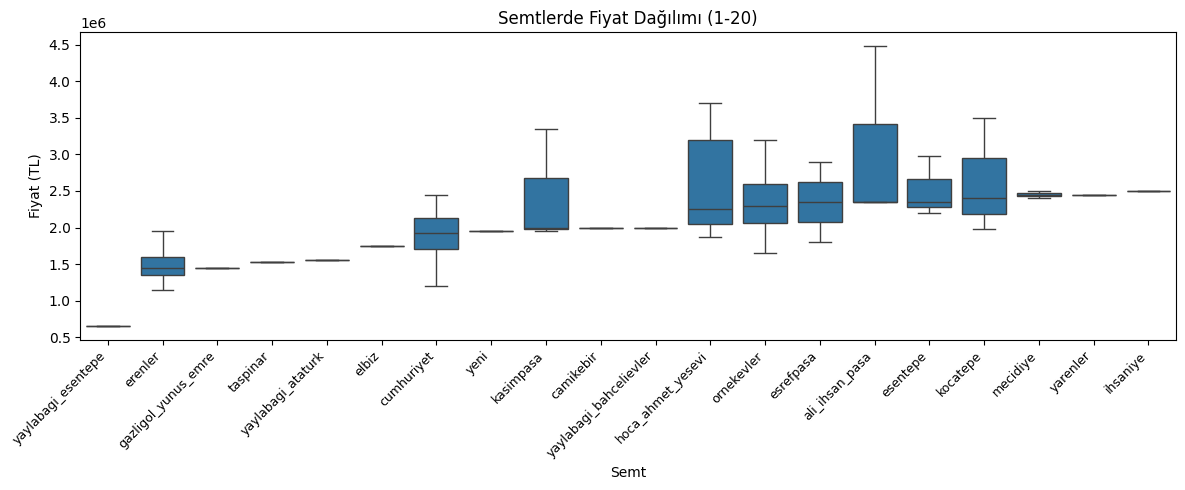

C:\Users\sema_\AppData\Local\Temp\ipykernel_21828\2394394569.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=9)


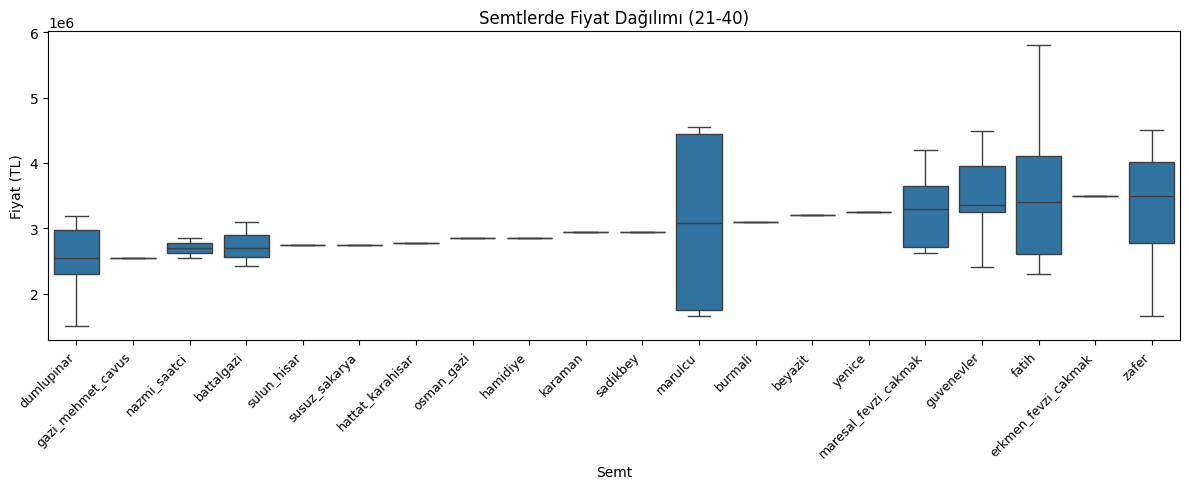

C:\Users\sema_\AppData\Local\Temp\ipykernel_21828\2394394569.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=9)


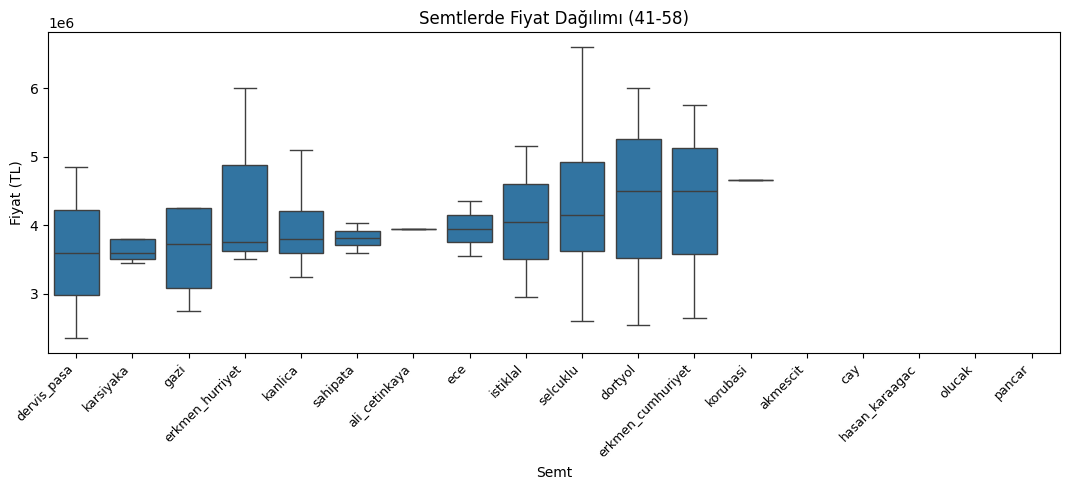

In [52]:
# 1) Tüm semtleri medyan fiyata göre sırala
order = (df.groupby("neighborhood")["price"]
           .median()
           .sort_values()
           .index
           .tolist())

# 2) Kaçar kaçar göstereceğiz?
chunk_size = 20

# 3) Sayfa sayfa çiz
for i in range(0, len(order), chunk_size):
    batch = order[i:i+chunk_size]
    sub = df[df["neighborhood"].isin(batch)]

    fig, ax = plt.subplots(figsize=(max(10, 0.6*len(batch)), 5))
    sns.boxplot(data=sub, x="neighborhood", y="price",
                order=batch, showfliers=False, ax=ax)

    ax.set_title(f"Semtlerde Fiyat Dağılımı ({i+1}-{i+len(batch)})")
    ax.set_xlabel("Semt"); ax.set_ylabel("Fiyat (TL)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=9)

    fig.tight_layout()
    plt.show()